In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def imshow(img, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray", interpolation="lanczos")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title, fontsize=20)
    

# Image derivative examples with continuous derivative

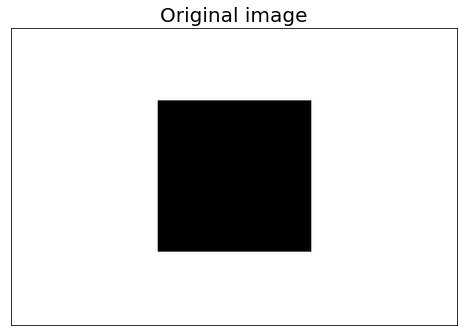

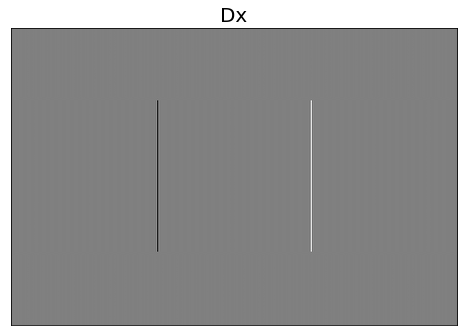

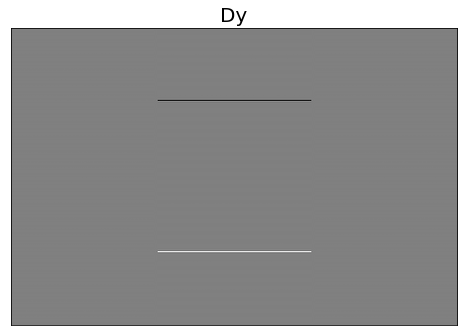

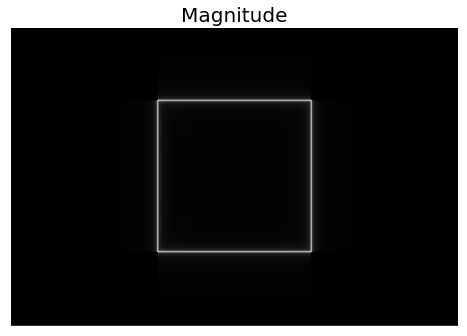

In [3]:
from numpy.fft import fft2, ifft2, fftshift

# Example Box
img_box = np.ones((520, 780), dtype=np.uint8) * 255
img_box[128:(520-128), 256:(780-256)] = 0
imshow(img_box, "Original image")

N = img_box.shape[1]
k = np.array(
    list(range(0, N//2)) + 
    list(range(-(N//2), 0))
)
img_dx = np.real(ifft2(1.0j * (2 * np.pi / N) * k[None] * fft2(img_box)))
imshow(img_dx, "Dx")

N = img_box.shape[0]
k = np.array(
    list(range(0, N//2)) + 
    list(range(-(N//2), 0))
)
img_dy = np.real(ifft2(1.0j * (2 * np.pi / N) * k[..., None] * fft2(img_box)))
imshow(img_dy, "Dy")
img_mag = np.sqrt(img_dx**2 + img_dy**2)
imshow(img_mag, "Magnitude")

# Image derivative examples with discrete derivative

In [4]:
# The derivative filters (flipped to use correlation)
dx_filter = np.array([
    [0, 0, 0],
    [0, -1, 1],
    [0, 0, 0],
])
dy_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 0, 0],
])

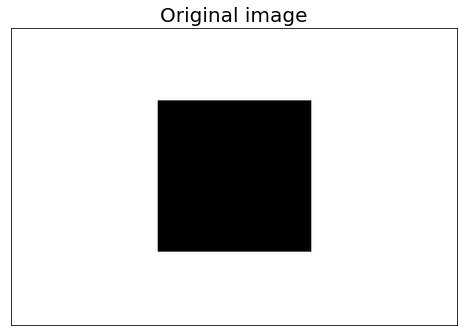

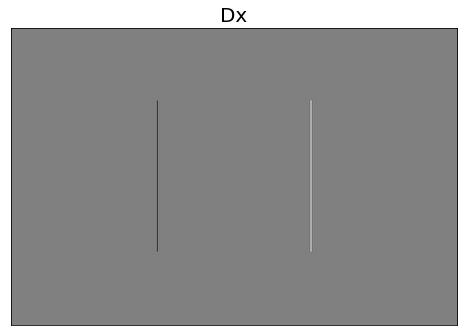

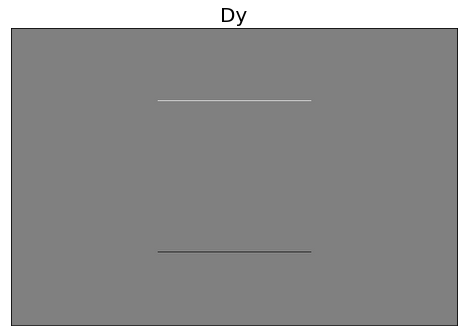

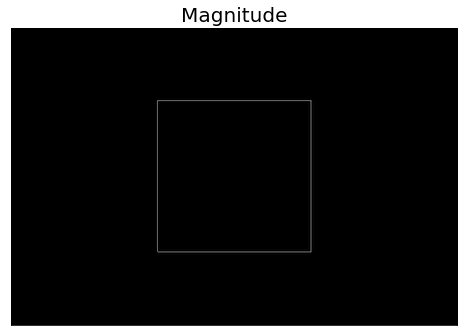

In [5]:
# Example Box
img_box = np.ones((520, 780), dtype=np.uint8) * 255
img_box[128:(520-128), 256:(780-256)] = 0
imshow(img_box, "Original image")

img_dx = cv2.filter2D(img_box, cv2.CV_32F, dx_filter)
imshow(img_dx, "Dx")
img_dy = cv2.filter2D(img_box, cv2.CV_32F, dy_filter)
imshow(img_dy, "Dy")
img_mag = np.sqrt(img_dx**2 + img_dy**2)
imshow(img_mag, "Magnitude")

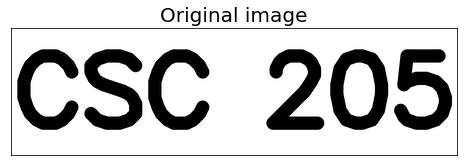

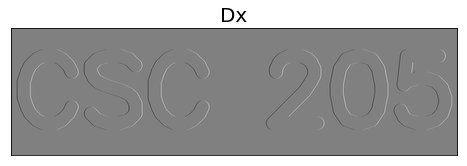

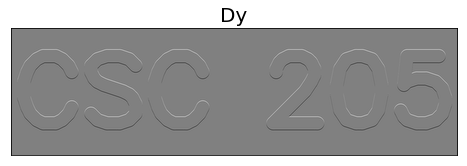

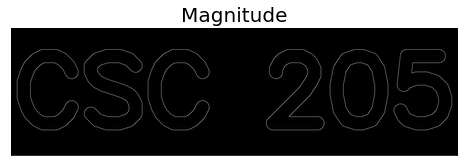

In [6]:
# Example CSC 205
img_csc205 = np.ones((400, 1400), dtype=np.uint8) * 200
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_csc205, "CSC 205", (10, 300), font, 10, 0, 40, cv2.LINE_AA)
imshow(img_csc205, "Original image")

img_dx = cv2.filter2D(img_csc205, cv2.CV_32F, dx_filter)
imshow(img_dx, "Dx")
img_dy = cv2.filter2D(img_csc205, cv2.CV_32F, dy_filter)
imshow(img_dy, "Dy")
img_mag = np.sqrt(img_dx**2 + img_dy**2)
imshow(img_mag, "Magnitude")

# Using DoG and LoG to detect edges

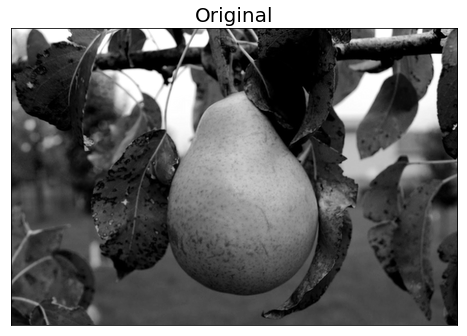

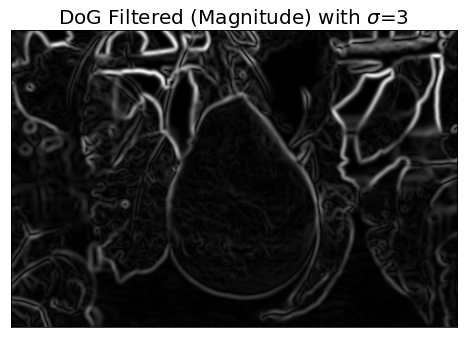

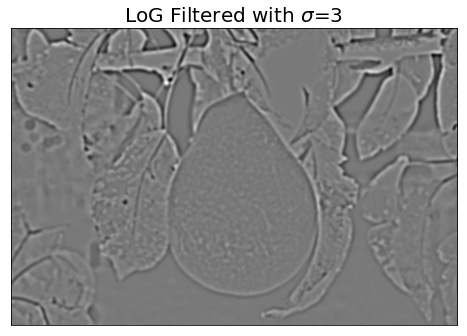

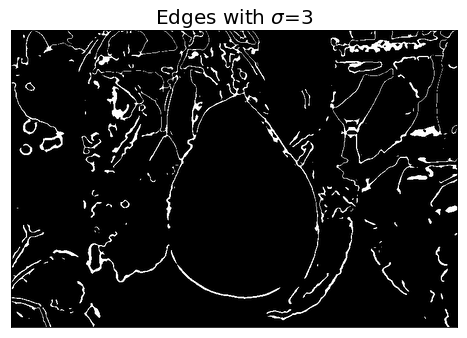

In [7]:
from scipy.ndimage import gaussian_gradient_magnitude, gaussian_laplace

# Image
img = cv2.imread("../images/pair-color.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Parameter for filtering
sigma = 3

# Filtering original image with this filter
imshow(img_gray, "Original")
img_dog = gaussian_gradient_magnitude(img_gray.astype(float), sigma)
imshow(img_dog, "DoG Filtered (Magnitude) with $\sigma$={}".format(sigma))
img_log = gaussian_laplace(img_gray.astype(float), sigma)
imshow(img_log, "LoG Filtered with $\sigma$={}".format(sigma))

# Find zero crossings
dog_th = 5
log_th = 1
imshow((img_dog > dog_th) * (abs(img_log) < log_th), 
       "Edges with $\sigma$={}".format(sigma))

